# Bag-of-words (BoW)

Bag-of-words (BoW) is a statistical language model based on **word count** ( = how many times each word appears in a document)  
Bag-of-words has high *perplexity*, meaning that it’s *not* a very accurate model for language prediction.  
BoW suffers from *overfitting* when it comes to vocabulary (if in the corpus, with which it was trained, there is not  a certain word)

* **Statistical language model** :   
is a way for computers to make sense of language based on probability. 
  *     **unigram model**: n-gram model, with n = 1 (the number of words in a sequence)
  * **bigram model**  
  * and so on

* **Feature extraction** or **Vectorization**:  
for a word present in a document; we want to know how many times it occurred


> ex:  
-*Features Dictionnary*:  
{'**five**': 0,  
'fantastic': 1,  
'**fish**': 2,  
'fly': 3,  
'off': 4,  
'to': 5,  
'**find**': 6,  
'**faraway**': 7,  
'function': 8,  
'maybe': 9,  
'**another**': 10}  
-For the *string* (sentence) :  "Another five fish find another faraway fish."  
-We get *BoW vector* (in form of a list):    [1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2]

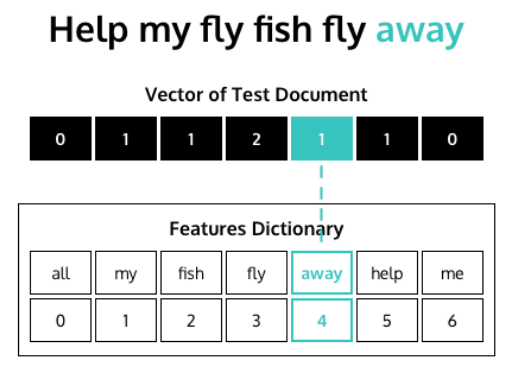


### Global overview : 


* Bag-of-words (BoW) = unigram model = statistical language model based on word count (that have a lot of real-world applications for BoW).


* BoW can be implemented as a Python **features dictionary** with each *key* = a word ; and each *value* = number of times that word appears in a text (corpus used coming from a training set).
* For BoW, training data is the text that is used to build a BoW model.
* *BoW test data* is the new text that is converted to a **BoW vector** using a trained **features dictionary**.
* A feature vector is a numeric depiction of an item’s salient features.
* **Feature extraction (or vectorization) is the process of turning text into a BoW vector**.
* A features dictionary is a mapping of each unique word in the training data to a unique index. This is used to build out BoW vectors.


* Because bag-of-words relies on single words, rather than sequences of words, there are more examples of each unit of language in the training corpus. More examples means the model has less **data sparsity**.   
  -> BoW has less data sparsity than other statistical models.   
  -> It also suffers less from overfitting.


* BoW has **higher perplexity** than other models,    
  making it less ideal for language prediction.


* **Language smoothing** is a solution to avoid overfitting in NLP. It takes a bit of probability from known words and allots it to unknown words. This causes the unknown words to have a probability of more than 0.

> **Bag-of-words dictionary (BoW dictionary)**:    
   *key* = a word ; and each *value* = number of times that word appears in a text
- "Squealing suitcase squids are not like regular squids."   
   {'squeal': 1, 'like': 1, 'not': 1, 'suitcase': 1, 'be': 1, 'regular': 1, 'squid': 2}

> **Features dictionary**: (is used to build out bag-of-words **vectors**)  
- “Squealing suitcase squids are not like regular squids”  
   -> {'squeal': 0, 'suitcase': 1, 'squid': 2, 'be': 3, 'not': 4, 'like': 5, 'regular': 6}     
-  ["Five fantastic fish flew off to find faraway functions.", 
   "Maybe find another five fantastic fish?", "Find my fish with a function please!"]  
   -> {'five': 0, 'fantastic': 1, 'fish': 2, 'fly': 3, 'off': 4, 'to': 5, 'find': 6, 'faraway': 7, 'function': 8, 'maybe': 9, 'another': 10, 'my': 11, 'with': 12, 'a': 13, 'please': 14}    
- ["How much wood would a woodchuck chuck if a woodchuck could chuck wood?"]  
   -> {"how": 0, "much": 1, "wood": 2, "would": 3, "a": 4, "woodchuck": 5, "chuck": 6, "if": 7, "could": 8}

> To know :  
length (bag-of-words vector) = length (features dictionary)

> **BoW feature vector**  *(mapping based on Features dictionary)*    
Features dictionary = 
{'five': 0,
'fantastic': 1,
'fish': 2,
'fly': 3,
'off': 4,
'to': 5,
'find': 6,
'faraway': 7,
'function': 8,
'maybe': 9,
'another': 10}  
“Another five fish find another faraway fish.”  ===> [1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2] = **BoW feature vector** 
   

> **Feature extraction** (or **vectorization**):   
given the following **features dictionary** mapping:  
{'are':0, 
 'many':1, 
 'success':2, 
 'there':3, 
 'to':4, 
 'ways':5}  
"many success ways" ===> [0, 1, 1, 0, 0, 1] (BoW vector)





## 1/ Feature extraction or Vectorization

1-a / Detailed **step-by-step** code  
Creates word vector (**features dictionnary** then, **word-vector creation**) 

In [127]:
#######################################################################################
import nltk, re
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

stop_words = stopwords.words('english')
normalizer = WordNetLemmatizer()

def get_part_of_speech(word): # ADJ, ADJ_SAT, ADV, NOUN, VERB = 'a', 's', 'r', 'n', 'v'
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

def preprocess_text(text):
    cleaned = re.sub(r'\W+', ' ', text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = [normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized]
    return normalized

# ABOVE : is for the pre-processing part to tokenize + lemmatization 
#######################################################################################
# the code to understand is BELOW

# every unique word that is trained with a corpus, will be inside it
def create_features_dictionary(documents):   # ---> Features dictionnary
    features_dictionary = {}
    merged = " ".join(documents)
    tokens = preprocess_text(merged) # every token is under its lemmatized form
    index = 0
    for token in tokens:
        if token not in features_dictionary:
            features_dictionary[token] = index
            index +=1
    return features_dictionary, tokens

training_documents = ["Five fantastic fish flew off to find faraway functions.", 
"Maybe find another five fantastic fish?", "Find my fish with a function please!"]
# tuple so we need to take back the first element of this thing here, that is a dict
features_dictionary = create_features_dictionary(training_documents)[0]
print("- Features Dictionary:\n", features_dictionary) 


def text_to_bow_vector(some_text, features_dictionary):   # ---> Vectorization
    bow_vector = [0] * len(features_dictionary)
    tokens = preprocess_text(some_text)
    for token in tokens:
        feature_index = features_dictionary[token]
        bow_vector[feature_index] += 1
    return bow_vector, tokens


text = "Another five fish find another faraway fish."
print("\n - BoW Vector:\n", text_to_bow_vector(text, features_dictionary)[0])

- Features Dictionary:
 {'five': 0, 'fantastic': 1, 'fish': 2, 'fly': 3, 'off': 4, 'to': 5, 'find': 6, 'faraway': 7, 'function': 8, 'maybe': 9, 'another': 10, 'my': 11, 'with': 12, 'a': 13, 'please': 14}

 - BoW Vector:
 [1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0]


1-b / Built-in-library **ScikitLearn** (with specific implementation) code  
Creates a long word **features-dictionnary** based on words from a corpus (training set) then,   
a **word-vector** (based on features-dictionnary) as a test for the text provided (test set)


(both are not exactly vectors because of strange Scikitlearn transformations but are used like that).

In [128]:
##############################################################################################
# preprocessing steps for training and test sets (scikit needs it otherwise not working)
# we need just to create a list of sentences (to "feed" the scikit learn algorithm)

from nltk.tokenize import PunktSentenceTokenizer
from nltk.tokenize import sent_tokenize
import re

# training set ---
texte = open("the_iliad.txt",encoding='utf-8').read().lower() # is a string, for the moment
texte = re.sub('[\@#$\n""'';,:]', '', texte) # deletes all signs but keeps the points
texte = re.sub('[0-9]', '', texte) # deletes all numbers
# "PunktSentenceTokenizer" = divides text into list of sentences (use unsupervised algorithm)
sentence_tokenizer = PunktSentenceTokenizer(texte)
sentence_tokenized = sentence_tokenizer.tokenize(texte) # becomes a list 
training_docs = sentence_tokenized

# test set ---
test_text = ["We will see if it works with three sentences.", 
            "Will it work with the words inside the corpus?", 
            "If not more corpus are usefull to train the model bolow!"]
# we need just to create a list of sentences (to "feed" the algorithm)
texte = " ".join(test_docs).lower() # is a string
texte = re.sub('[\@#$\n""'';,:]', '', texte) # deletes all signs but keeps the points
texte = re.sub('[0-9]', '', texte) # deletes all numbers
# "PunktSentenceTokenizer" = divides text into list of sentences (use unsupervised algorithm)
sentence_tokenizer = PunktSentenceTokenizer(texte)
sentence_tokenized = sentence_tokenizer.tokenize(texte) # becomes a list
test_docs = sentence_tokenized


##############################################################################################
# this part is creating a dictionnary (based on the corpus 'Iliad') for the training vector
# and a Bow vector, for the test_vectors, that is based on the test_text above (3 sentences)


# Import CountVectorizer from sklearn:
from sklearn.feature_extraction.text import CountVectorizer


# Define bow_vectorizer "bow_vector":
bow_vectorizer = CountVectorizer()


# Define training_vectors:  # if corpus long => training_vectors also
training_vectors = bow_vectorizer.fit_transform(training_docs)
# with "training_docs" = list containing long text
# "fit_transform()": features-dictionary + vectorization (array) of training data (corpus)
#print(bow_vectorizer.get_feature_names()) # check
print(" -training_vectors 'features-dictionnary': \n",
      training_vectors.toarray(),
"\n\n(#sentence corpus x # words corpus)")   # check the array


# Define test_vectors: 
# will be a looong array because is based on a long features-dictionnary (from a long corpus)
test_vectors = bow_vectorizer.transform(test_docs) # because of the corpus
print("\n\n -test_vectors 'word-vector': \n",
      test_vectors.toarray(),
     "\n\n(3 x # words corpus)")             # check final array ("test_set")

 -training_vectors 'features-dictionnary': 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

(#sentence corpus x # words corpus)


 -test_vectors 'word-vector': 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

(3 x # words corpus)


## 2) BoW application to see most frequent used words in a text
**Comparaison between Bigramms and Bow**

In [129]:
import nltk, re
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

stop_words = stopwords.words('english')
normalizer = WordNetLemmatizer()

def get_part_of_speech(word): # ADJ, ADJ_SAT, ADV, NOUN, VERB = 'a', 's', 'r', 'n', 'v'
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

def preprocess_text(text):
    cleaned = re.sub(r'\W+', ' ', text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = [normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized]
    return normalized

# ABOVE : is for the pre-processing part to tokenize + lemmatization 
# -------------------------------------------------------------------------------------------------------
# the code to understand is BELOW

from nltk.util import ngrams

text = "It's exciting to watch flying fish after a hard day's work. \
I don't know why some fish prefer flying and other fish would rather swim.\
It seems like the fish just woke up one day and decided, 'hey, today is the day to fly away.'"

tokens = preprocess_text(text)

# Bigram approach:
bigrams_prepped = ngrams(tokens, 2) # creates a transitory object of two paired tokens
bigrams = Counter(bigrams_prepped) # creates dict and count words
bigrams_most_common = bigrams.most_common(3) # most frequent terms

# Bag-of-Words approach:
bag_of_words = Counter(tokens)
most_common_three = bag_of_words.most_common(3)

# Prints
print("BIGRAMS:")
print("- Word sequences and the number of occurrences according to Bigrams:", bigrams)
print("- Three most frequent word sequences and the number of occurrences according to Bigrams:",
      bigrams_most_common) # most frequent terms
print("\nBoW:")
print("- Three most frequent words and number of occurrences according to Bag-of-Words:", 
      most_common_three)

BIGRAMS:
- Word sequences and the number of occurrences according to Bigrams: Counter({('it', 's'): 1, ('s', 'excite'): 1, ('excite', 'to'): 1, ('to', 'watch'): 1, ('watch', 'fly'): 1, ('fly', 'fish'): 1, ('fish', 'after'): 1, ('after', 'a'): 1, ('a', 'hard'): 1, ('hard', 'day'): 1, ('day', 's'): 1, ('s', 'work'): 1, ('work', 'i'): 1, ('i', 'don'): 1, ('don', 't'): 1, ('t', 'know'): 1, ('know', 'why'): 1, ('why', 'some'): 1, ('some', 'fish'): 1, ('fish', 'prefer'): 1, ('prefer', 'fly'): 1, ('fly', 'and'): 1, ('and', 'other'): 1, ('other', 'fish'): 1, ('fish', 'would'): 1, ('would', 'rather'): 1, ('rather', 'swim'): 1, ('swim', 'it'): 1, ('it', 'seem'): 1, ('seem', 'like'): 1, ('like', 'the'): 1, ('the', 'fish'): 1, ('fish', 'just'): 1, ('just', 'wake'): 1, ('wake', 'up'): 1, ('up', 'one'): 1, ('one', 'day'): 1, ('day', 'and'): 1, ('and', 'decide'): 1, ('decide', 'hey'): 1, ('hey', 'today'): 1, ('today', 'be'): 1, ('be', 'the'): 1, ('the', 'day'): 1, ('day', 'to'): 1, ('to', 'fly'): 1, 